In [1]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#Importing Data Frame
df=pd.read_csv(r"C:\Users\HP\Documents\OASIS\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Checking for null valoues
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
#checking for duplicated rows
df.duplicated().sum()

0

In [7]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [8]:
df['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [9]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

# Deleting Unnecessary Columns

In [10]:
df=df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Splitting Data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Sales'],axis=1),df["Sales"],test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Training

In [13]:
RFG = RandomForestRegressor()
RFG_model = RFG.fit(x_train,y_train)
y_pred_train = RFG_model.predict(x_train)
y_pred_test = RFG_model.predict(x_test)

# Checking Performance

In [14]:
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

(0.9963603096534773, 0.980650252317989)

In [15]:
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(0.30724569769160287, 0.7815034069023624)

In [16]:
#predicting with the model
TV = float(input("TV :  "))
Radio = float(input("Radio : "))
Newspaper= float(input("Newspaper : "))
result = RFG_model.predict([[TV,Radio,Newspaper]])[0]
print("Predicted sales value",result)

TV :  30.1
Radio : 37.8
Newspaper : 69.2
Predicted sales value 9.201999999999998


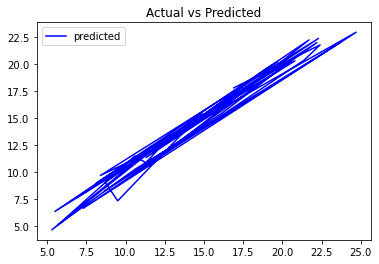

In [17]:
# Actual data vs predicted data
plt.plot(y_test,y_pred_test,color = 'blue',label = 'predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()